In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
k = 20
LAMBDA = 0.1
lr = 0.02
MAX_ITERS = 40
training_file = 'ratings.train.txt'
openfile = open(training_file, 'r')

min_user_id = 1000000000
max_user_id = -1000000000
min_item_id = 1000000000
max_item_id = -1000000000

for line in openfile:
  user_id, item_id, rating = list(int(x) for x in line.strip().split("\t"))

  if user_id < min_user_id: min_user_id = user_id
  if user_id > max_user_id: max_user_id = user_id
  if item_id < min_item_id: min_item_id = item_id
  if item_id > max_item_id: max_item_id = item_id

In [65]:
Q = np.random.rand(max_item_id, k) * 0.5
P = np.random.rand(max_user_id, k) * 0.5

Iteration = []
E_list = []

for iter in range(MAX_ITERS):
  openfile.seek(0)
  for line in openfile:
    u, i, r = list(int(x) for x in line.strip().split("\t"))
    u -= 1
    i -= 1
    epsilon_iu = 2 * (r - Q[i] @ P[u].T)
    Q_i_new = Q[i] + lr * (epsilon_iu * P[u] - 2 * LAMBDA * Q[i])
    P_u_new = P[u] + lr * (epsilon_iu * Q[i] - 2 * LAMBDA * P[u])
    Q[i] = Q_i_new
    P[u] = P_u_new

  openfile.seek(0)
  E = 0
  for line in openfile:
    u, i, r = list(int(x) for x in line.strip().split("\t"))
    u -= 1
    i -= 1
    E += (r - Q[i] @ P[u].T) ** 2
  E += LAMBDA * (np.sum(P ** 2) + np.sum(Q ** 2))
  E_list.append(E)
  Iteration.append(iter + 1)
  print("Iteration {}, error E is: {}".format(iter + 1, E))

Iteration 1, error E is: 88531.4995916512
Iteration 2, error E is: 86628.93040369936
Iteration 3, error E is: 83994.81832936374
Iteration 4, error E is: 80824.41283344176
Iteration 5, error E is: 77943.68691495991
Iteration 6, error E is: 75160.56984484187
Iteration 7, error E is: 72438.26483632797
Iteration 8, error E is: 69915.59239120041
Iteration 9, error E is: 67700.4481051504
Iteration 10, error E is: 65818.24333212452
Iteration 11, error E is: 64241.88436107069
Iteration 12, error E is: 62925.987058562045
Iteration 13, error E is: 61825.048407778195
Iteration 14, error E is: 60899.755701822214
Iteration 15, error E is: 60117.905897662735
Iteration 16, error E is: 59453.55039900507
Iteration 17, error E is: 58885.82469741129
Iteration 18, error E is: 58397.91114132286
Iteration 19, error E is: 57976.209354516686
Iteration 20, error E is: 57609.685238644386
Iteration 21, error E is: 57289.35753083156
Iteration 22, error E is: 57007.890091926245
Iteration 23, error E is: 56759.2672

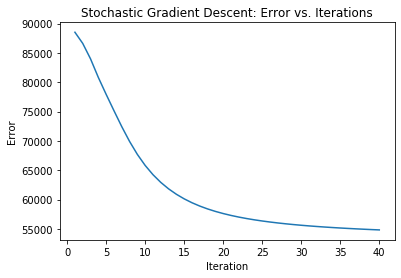

In [66]:
plt.figure()
plt.plot(Iteration, E_list)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Stochastic Gradient Descent: Error vs. Iterations')
plt.savefig('q3.png')
plt.show()